In [54]:
import pandas as pd
import os 
import matplotlib.pyplot as plt

In [55]:
# df border crossing 

df_border_crossing = pd.read_csv(f"./dataRaw/{os.listdir('./dataRaw')[0]}")

# Adding year value

df_border_crossing['nr_year'] = df_border_crossing['Date'].map(lambda x: int(x[-4:]))



## 📊 **# border crossing**

(*) Data shown in millions


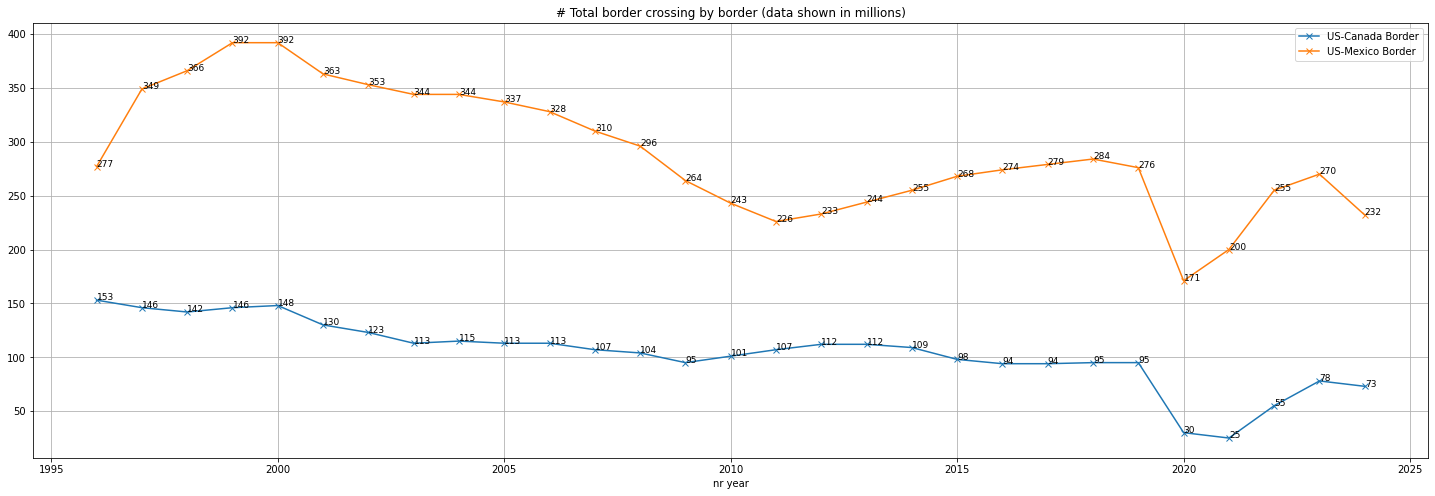

In [57]:
# df tottal border crossing split by border
df_sum = df_border_crossing.groupby(['nr_year', 'Border'])['Value'].sum().unstack().fillna(0)

# Transform values in Millions
for i in df_sum.columns:
    new_row = []
    for y in df_sum[i]:
        new_row.append(int(round(y/1000000,0)))
    
    df_sum[i] = new_row

# Plot
plt.figure(figsize=(25, 8))

# Labels
for border in df_sum.columns:
    plt.plot(df_sum.index, df_sum[border], marker='x', label=border)
    for x, y in zip(df_sum.index, df_sum[border]):
        plt.text(x, y, str(y), fontsize=9)

plt.xlabel('nr year')
plt.title('# Total border crossing by border (data shown in millions)')
plt.legend()
plt.grid(True)
plt.show()